In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
df=pd.read_csv(r"C:\Users\malik\Downloads\DSData-master\DSData-master\happiness_score_dataset.csv")
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [4]:
pd.set_option('display.max_rows',None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.shape

(158, 12)

In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [8]:
df.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

In [9]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [10]:
corr_mat=df.corr()


In [11]:
corr_mat

Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992105   
Happiness Score                     -0.992105         1.000000   
Standard Error                       0.158516        -0.177254   
Economy (GDP per Capita)            -0.785267         0.780966   
Family                              -0.733644         0.740605   
Health (Life Expectancy)            -0.735613         0.724200   
Freedom                             -0.556886         0.568211   
Trust (Government Corruption)       -0.372315         0.395199   
Generosity                          -0.160142         0.180319   
Dystopia Residual                   -0.521999         0.530474   

                               Standard Error  Economy (GDP per Capita)  \
Happiness Rank                       0.158516                 -0.785267   
Happiness Score                     -0.177254                  0.780966   
Standard Error                       1.000000                 -0.217651   
Economy (GDP per Capita)            -0.217651                  1.000000   
Family                              -0.120728                  0.645299   
Health (Life Expectancy)            -0.310287                  0.816478   
Freedom                             -0.129773                  0.370300   
Trust (Government Corruption)       -0.178325                  0.307885   
Generosity                          -0.088439                 -0.010465   
Dystopia Residual                    0.083981                  0.040059   

                                 Family  Health (Life Expectancy)   Freedom  \
Happiness Rank                -0.733644                 -0.735613 -0.556886   
Happiness Score                0.740605                  0.724200  0.568211   
Standard Error                -0.120728                 -0.310287 -0.129773   
Economy (GDP per Capita)       0.645299                  0.816478  0.370300   
Family                         1.000000                  0.531104  0.441518   
Health (Life Expectancy)       0.531104                  1.000000  0.360477   
Freedom                        0.441518                  0.360477  1.000000   
Trust (Government Corruption)  0.205605                  0.248335  0.493524   
Generosity                     0.087513                  0.108335  0.373916   
Dystopia Residual              0.148117                  0.018979  0.062783   

                               Trust (Government Corruption)  Generosity  \
Happiness Rank                                     -0.372315   -0.160142   
Happiness Score                                     0.395199    0.180319   
Standard Error                                     -0.178325   -0.088439   
Economy (GDP per Capita)                            0.307885   -0.010465   
Family                                              0.205605    0.087513   
Health (Life Expectancy)                            0.248335    0.108335   
Freedom                                             0.493524    0.373916   
Trust (Government Corruption)                       1.000000    0.276123   
Generosity                                          0.276123    1.000000   
Dystopia Residual                                  -0.033105   -0.101301   

                               Dystopia Residual  
Happiness Rank                         -0.521999  
Happiness Score                         0.530474  
Standard Error                          0.083981  
Economy (GDP per Capita)                0.040059  
Family                                  0.148117  
Health (Life Expectancy)                0.018979  
Freedom                                 0.062783  
Trust (Government Corruption)          -0.033105  
Generosity                             -0.101301  
Dystopia Residual                       1.000000

In [12]:
x=df

In [13]:
x

Country                           Region  \
0                 Switzerland                   Western Europe   
1                     Iceland                   Western Europe   
2                     Denmark                   Western Europe   
3                      Norway                   Western Europe   
4                      Canada                    North America   
5                     Finland                   Western Europe   
6                 Netherlands                   Western Europe   
7                      Sweden                   Western Europe   
8                 New Zealand        Australia and New Zealand   
9                   Australia        Australia and New Zealand   
10                     Israel  Middle East and Northern Africa   
11                 Costa Rica      Latin America and Caribbean   
12                    Austria                   Western Europe   
13                     Mexico      Latin America and Caribbean   
14              United States                    North America   
15                     Brazil      Latin America and Caribbean   
16                 Luxembourg                   Western Europe   
17                    Ireland                   Western Europe   
18                    Belgium                   Western Europe   
19       United Arab Emirates  Middle East and Northern Africa   
20             United Kingdom                   Western Europe   
21                       Oman  Middle East and Northern Africa   
22                  Venezuela      Latin America and Caribbean   
23                  Singapore                Southeastern Asia   
24                     Panama      Latin America and Caribbean   
25                    Germany                   Western Europe   
26                      Chile      Latin America and Caribbean   
27                      Qatar  Middle East and Northern Africa   
28                     France                   Western Europe   
29                  Argentina      Latin America and Caribbean   
30             Czech Republic       Central and Eastern Europe   
31                    Uruguay      Latin America and Caribbean   
32                   Colombia      Latin America and Caribbean   
33                   Thailand                Southeastern Asia   
34               Saudi Arabia  Middle East and Northern Africa   
35                      Spain                   Western Europe   
36                      Malta                   Western Europe   
37                     Taiwan                     Eastern Asia   
38                     Kuwait  Middle East and Northern Africa   
39                   Suriname      Latin America and Caribbean   
40        Trinidad and Tobago      Latin America and Caribbean   
41                El Salvador      Latin America and Caribbean   
42                  Guatemala      Latin America and Caribbean   
43                 Uzbekistan       Central and Eastern Europe   
44                   Slovakia       Central and Eastern Europe   
45                      Japan                     Eastern Asia   
46                South Korea                     Eastern Asia   
47                    Ecuador      Latin America and Caribbean   
48                    Bahrain  Middle East and Northern Africa   
49                      Italy                   Western Europe   
50                    Bolivia      Latin America and Caribbean   
51                    Moldova       Central and Eastern Europe   
52                   Paraguay      Latin America and Caribbean   
53                 Kazakhstan       Central and Eastern Europe   
54                   Slovenia       Central and Eastern Europe   
55                  Lithuania       Central and Eastern Europe   
56                  Nicaragua      Latin America and Caribbean   
57                       Peru      Latin America and Caribbean   
58                    Belarus       Central and Eastern Europe   
59                     Poland       Central and Eastern Europe

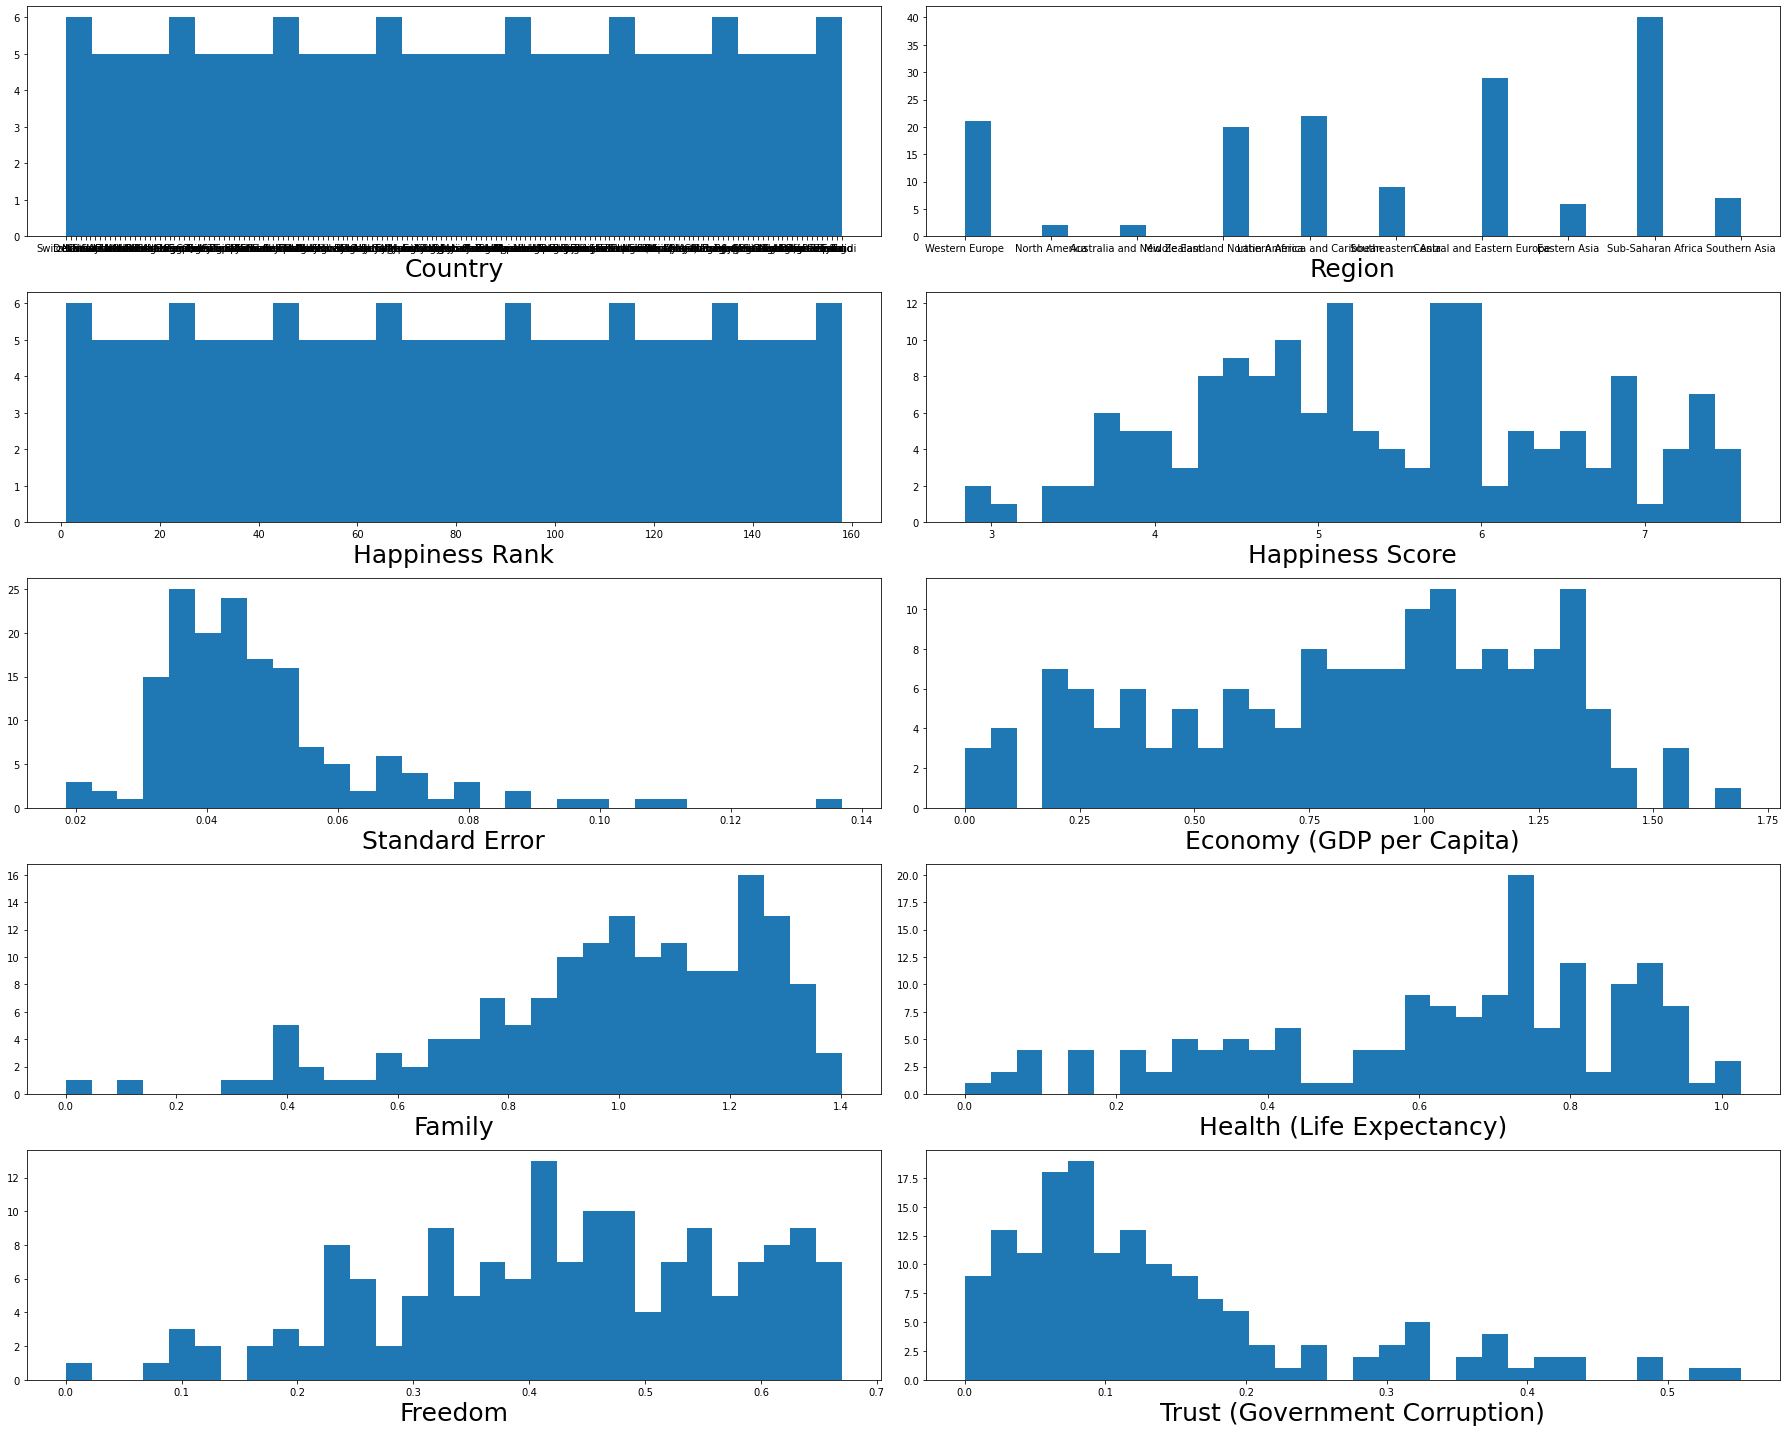

In [14]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()
        
   

In [15]:
z_score=zscore(df[['Family','Freedom','Economy (GDP per Capita)','Health (Life Expectancy)','Trust (Government Corruption)','Generosity']])
abs_z_score=np.abs(z_score)

filtering_entry = (abs_z_score <2).all(axis=1)

df=df[filtering_entry]


In [16]:
df.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      122.000000       122.000000      122.000000   
mean        76.672131         5.438500        0.047730   
std         43.268610         1.060705        0.016426   
min          2.000000         3.006000        0.018480   
25%         42.250000         4.651750        0.038323   
50%         72.500000         5.451500        0.044305   
75%        112.500000         6.128250        0.050670   
max        156.000000         7.561000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                122.000000  122.000000                122.000000   
mean                   0.880783    1.027623                  0.663260   
std                    0.362753    0.218447                  0.209219   
min                    0.069400    0.464750                  0.150100   
25%                    0.607043    0.889048                  0.573860   
50%                    0.929910    1.048740                  0.708780   
75%                    1.150612    1.218783                  0.807853   
max                    1.563910    1.402230                  1.013280   

          Freedom  Trust (Government Corruption)  Generosity  \
count  122.000000                     122.000000  122.000000   
mean     0.434412                       0.124894    0.221310   
std      0.133285                       0.091784    0.110375   
min      0.156840                       0.006490    0.001990   
25%      0.332072                       0.058450    0.137263   
50%      0.435515                       0.104710    0.207305   
75%      0.541323                       0.173310    0.282860   
max      0.669730                       0.377980    0.479980   

       Dystopia Residual  
count         122.000000  
mean            2.086239  
std             0.563195  
min             0.328580  
25%             1.754882  
50%             2.087970  
75%             2.448193  
max             3.602140

In [17]:
data=df.drop(df.columns[[0,1]], axis = 1)



In [18]:
data

Happiness Rank  Happiness Score  Standard Error  \
1                 2            7.561         0.04884   
3                 4            7.522         0.03880   
4                 5            7.427         0.03553   
6                 7            7.378         0.02799   
9                10            7.284         0.04083   
10               11            7.278         0.03470   
11               12            7.226         0.04454   
12               13            7.200         0.03751   
13               14            7.187         0.04176   
14               15            7.119         0.03839   
15               16            6.983         0.04076   
16               17            6.946         0.03499   
17               18            6.940         0.03676   
18               19            6.937         0.03595   
21               22            6.853         0.05335   
22               23            6.810         0.06476   
24               25            6.786         0.04910   
25               26            6.750         0.01848   
26               27            6.670         0.05800   
28               29            6.575         0.03512   
29               30            6.574         0.04612   
30               31            6.505         0.04168   
31               32            6.485         0.04539   
32               33            6.477         0.05051   
34               35            6.411         0.04633   
35               36            6.329         0.03468   
37               38            6.298         0.03868   
38               39            6.295         0.04456   
39               40            6.269         0.09811   
40               41            6.168         0.10895   
41               42            6.130         0.05618   
42               43            6.123         0.05224   
43               44            6.003         0.04361   
44               45            5.995         0.04267   
45               46            5.987         0.03581   
46               47            5.984         0.04098   
47               48            5.975         0.04528   
48               49            5.960         0.05412   
49               50            5.948         0.03914   
50               51            5.890         0.05642   
51               52            5.889         0.03799   
52               53            5.878         0.04563   
53               54            5.855         0.04114   
54               55            5.848         0.04251   
55               56            5.833         0.03843   
56               57            5.828         0.05371   
57               58            5.824         0.04615   
58               59            5.813         0.03938   
59               60            5.791         0.04263   
60               61            5.770         0.04330   
61               62            5.759         0.04394   
62               63            5.754         0.07832   
63               64            5.716         0.03135   
64               65            5.709         0.13693   
65               66            5.695         0.05635   
66               67            5.689         0.05580   
67               68            5.605         0.05099   
68               69            5.589         0.05018   
69               70            5.548         0.04175   
70               71            5.477         0.07197   
71               72            5.474         0.05051   
72               73            5.429         0.04013   
74               75            5.360         0.03107   
75               76            5.332         0.03864   
76               77            5.286         0.03823   
77               78            5.268         0.04192   
78               79            5.253         0.03225   
79               80            5.212         0.03363   
81               82            5.192         0.04524   
82               82            5.192         0.05235   
83               84          

In [19]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=10:
        ax =plt.subplot(5,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [20]:
sc=StandardScaler()
x=sc.fit_transform(data)
x

array([[-1.73289733,  2.00927946,  0.06784637, ...,  0.18112207,
         1.95585406,  1.0978621 ],
       [-1.68648384,  1.97235984, -0.54591773, ...,  2.62709411,
         1.14336483,  0.67584824],
       [-1.66327709,  1.88242743, -0.74581899, ...,  2.23916062,
         2.15426847,  0.65168986],
       ...,
       [ 1.72490813, -1.68836274,  0.22495531, ...,  0.59432702,
        -0.178852  , -1.19277992],
       [ 1.74811487, -1.75273542, -0.27449217, ...,  0.03747947,
        -0.03493105, -1.10771748],
       [ 1.84094187, -2.30274313,  0.14792913, ...,  0.70197693,
         2.27872096, -3.13374058]])

In [21]:
y=data['Happiness Score']
x=data.drop(columns=['Happiness Score'])

In [22]:
y

1      7.561
3      7.522
4      7.427
6      7.378
9      7.284
10     7.278
11     7.226
12     7.200
13     7.187
14     7.119
15     6.983
16     6.946
17     6.940
18     6.937
21     6.853
22     6.810
24     6.786
25     6.750
26     6.670
28     6.575
29     6.574
30     6.505
31     6.485
32     6.477
34     6.411
35     6.329
37     6.298
38     6.295
39     6.269
40     6.168
41     6.130
42     6.123
43     6.003
44     5.995
45     5.987
46     5.984
47     5.975
48     5.960
49     5.948
50     5.890
51     5.889
52     5.878
53     5.855
54     5.848
55     5.833
56     5.828
57     5.824
58     5.813
59     5.791
60     5.770
61     5.759
62     5.754
63     5.716
64     5.709
65     5.695
66     5.689
67     5.605
68     5.589
69     5.548
70     5.477
71     5.474
72     5.429
74     5.360
75     5.332
76     5.286
77     5.268
78     5.253
79     5.212
81     5.192
82     5.192
83     5.140
84     5.129
85     5.124
86     5.123
87     5.102
88     5.098
89     5.073

In [23]:
x

Happiness Rank  Standard Error  Economy (GDP per Capita)   Family  \
1                 2         0.04884                   1.30232  1.40223   
3                 4         0.03880                   1.45900  1.33095   
4                 5         0.03553                   1.32629  1.32261   
6                 7         0.02799                   1.32944  1.28017   
9                10         0.04083                   1.33358  1.30923   
10               11         0.03470                   1.22857  1.22393   
11               12         0.04454                   0.95578  1.23788   
12               13         0.03751                   1.33723  1.29704   
13               14         0.04176                   1.02054  0.91451   
14               15         0.03839                   1.39451  1.24711   
15               16         0.04076                   0.98124  1.23287   
16               17         0.03499                   1.56391  1.21963   
17               18         0.03676                   1.33596  1.36948   
18               19         0.03595                   1.30782  1.28566   
21               22         0.05335                   1.36011  1.08182   
22               23         0.06476                   1.04424  1.25596   
24               25         0.04910                   1.06353  1.19850   
25               26         0.01848                   1.32792  1.29937   
26               27         0.05800                   1.10715  1.12447   
28               29         0.03512                   1.27778  1.26038   
29               30         0.04612                   1.05351  1.24823   
30               31         0.04168                   1.17898  1.20643   
31               32         0.04539                   1.06166  1.20890   
32               33         0.05051                   0.91861  1.24018   
34               35         0.04633                   1.39541  1.08393   
35               36         0.03468                   1.23011  1.31379   
37               38         0.03868                   1.29098  1.07617   
38               39         0.04456                   1.55422  1.16594   
39               40         0.09811                   0.99534  0.97200   
40               41         0.10895                   1.21183  1.18354   
41               42         0.05618                   0.76454  1.02507   
42               43         0.05224                   0.74553  1.04356   
43               44         0.04361                   0.63244  1.34043   
44               45         0.04267                   1.16891  1.26999   
45               46         0.03581                   1.27074  1.25712   
46               47         0.04098                   1.24461  0.95774   
47               48         0.04528                   0.86402  0.99903   
48               49         0.05412                   1.32376  1.21624   
49               50         0.03914                   1.25114  1.19777   
50               51         0.05642                   0.68133  0.97841   
51               52         0.03799                   0.59448  1.01528   
52               53         0.04563                   0.75985  1.30477   
53               54         0.04114                   1.12254  1.12241   
54               55         0.04251                   1.18498  1.27385   
55               56         0.03843                   1.14723  1.25745   
56               57         0.05371                   0.59325  1.14184   
57               58         0.04615                   0.90019  0.97459   
58               59         0.03938                   1.03192  1.23289   
59               60         0.04263                   1.12555  1.27948   
60               61         0.04330                   1.12486  1.07023   
61               62         0.04394                   1.08254  0.79624   
62               63         0.07832                   1.13145  1.11862   
63               64         0.03135                   1.13764  1.23617   
64       

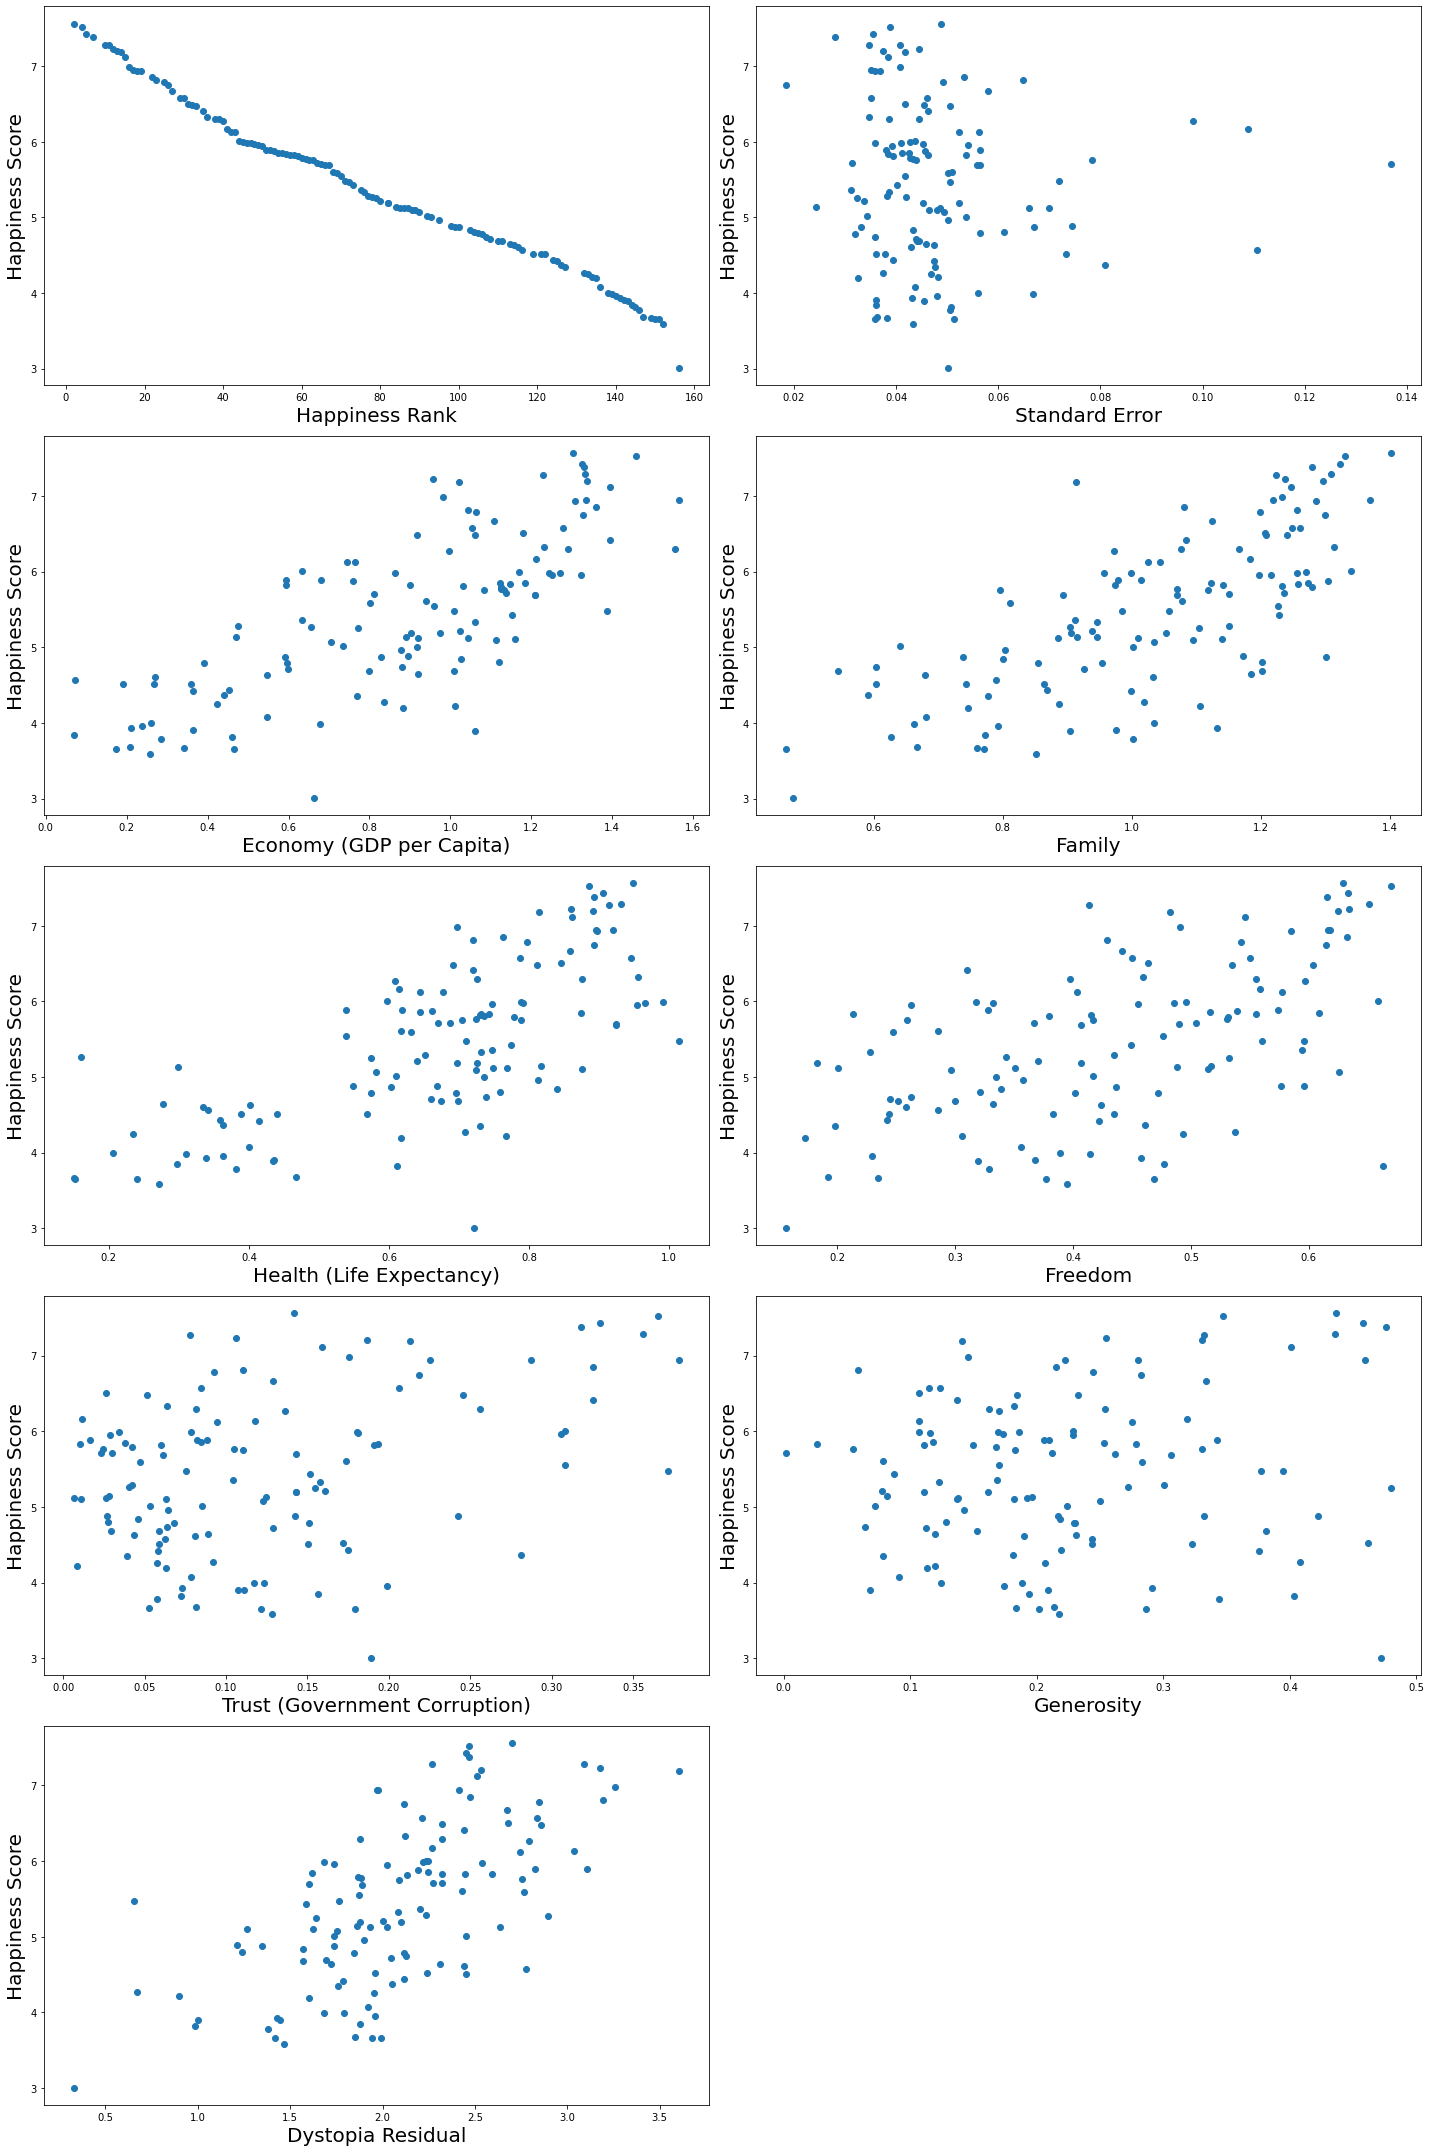

In [24]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=10:
        ax =plt.subplot(5,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [25]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [26]:
x_scaled

array([[-1.73289733,  0.06784637,  1.16684048, ...,  0.18112207,
         1.95585406,  1.0978621 ],
       [-1.68648384, -0.54591773,  1.60054086, ...,  2.62709411,
         1.14336483,  0.67584824],
       [-1.66327709, -0.74581899,  1.23319099, ...,  2.23916062,
         2.15426847,  0.65168986],
       ...,
       [ 1.72490813,  0.22495531, -1.14997434, ...,  0.59432702,
        -0.178852  , -1.19277992],
       [ 1.74811487, -0.27449217, -1.72357272, ...,  0.03747947,
        -0.03493105, -1.10771748],
       [ 1.84094187,  0.14792913, -0.60228506, ...,  0.70197693,
         2.27872096, -3.13374058]])

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=300)

In [28]:
y_train.head()

114    4.610
11     7.226
106    4.739
146    3.681
142    3.896
Name: Happiness Score, dtype: float64

In [29]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [30]:
data.head()

Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)  \
1               2            7.561         0.04884                   1.30232   
3               4            7.522         0.03880                   1.45900   
4               5            7.427         0.03553                   1.32629   
6               7            7.378         0.02799                   1.32944   
9              10            7.284         0.04083                   1.33358   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
1  1.40223                   0.94784  0.62877                        0.14145   
3  1.33095                   0.88521  0.66973                        0.36503   
4  1.32261                   0.90563  0.63297                        0.32957   
6  1.28017                   0.89284  0.61576                        0.31814   
9  1.30923                   0.93156  0.65124                        0.35637   

   Generosity  Dystopia Residual  
1     0.43630            2.70201  
3     0.34699            2.46531  
4     0.45811            2.45176  
6     0.47610            2.46570  
9     0.43562            2.26646

In [31]:
print('Happiness Score',regression.predict(scaler.transform([[4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531]])))

Happiness Score [7.52215316]


In [32]:
data.tail(10)

Happiness Rank  Happiness Score  Standard Error  \
142             143            3.896         0.04547   
143             144            3.845         0.03602   
144             145            3.819         0.05069   
145             146            3.781         0.05061   
146             147            3.681         0.03633   
148             149            3.667         0.03830   
149             150            3.656         0.03590   
150             151            3.655         0.05141   
151             152            3.587         0.04324   
155             156            3.006         0.05015   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
142                   1.06024  0.90528                   0.43372  0.31914   
143                   0.06940  0.77265                   0.29707  0.47692   
144                   0.46038  0.62736                   0.61114  0.66246   
145                   0.28520  1.00268                   0.38215  0.32878   
146                   0.20824  0.66801                   0.46721  0.19184   
148                   0.34193  0.76062                   0.15010  0.23501   
149                   0.17417  0.46475                   0.24009  0.37725   
150                   0.46534  0.77115                   0.15185  0.46866   
151                   0.25812  0.85188                   0.27125  0.39493   
155                   0.66320  0.47489                   0.72193  0.15684   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
142                        0.11091     0.06822            0.99895  
143                        0.15639     0.19387            1.87877  
144                        0.07247     0.40359            0.98195  
145                        0.05747     0.34377            1.38079  
146                        0.08124     0.21333            1.85100  
148                        0.05269     0.18386            1.94296  
149                        0.12139     0.28657            1.99172  
150                        0.17922     0.20165            1.41723  
151                        0.12832     0.21747            1.46494  
155                        0.18906     0.47179            0.32858

In [33]:

print('Happiness Score',regression.predict(scaler.transform([[156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858]])))


Happiness Score [3.00614691]


In [34]:
regression.score(x_train,y_train)

0.9999999454511393

In [35]:
regression.score(x_test,y_test)

0.9999998580607098

In [36]:
y_pred = regression.predict(x_test)

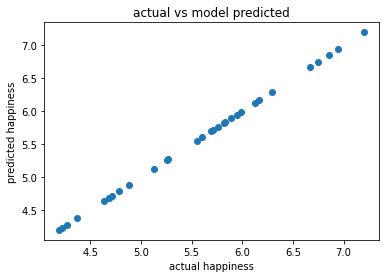

In [37]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual happiness')
plt.ylabel('predicted happiness')
plt.title('actual vs model predicted')
plt.show()